In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/DATA/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

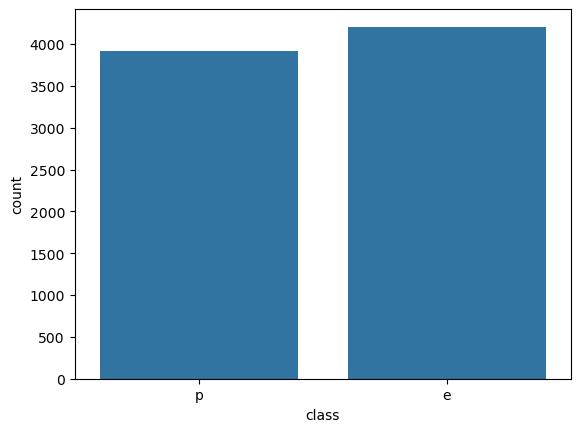

In [3]:
sns.countplot(data=df , x="class")

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
feat_uni = df.describe().transpose().reset_index().sort_values("unique")

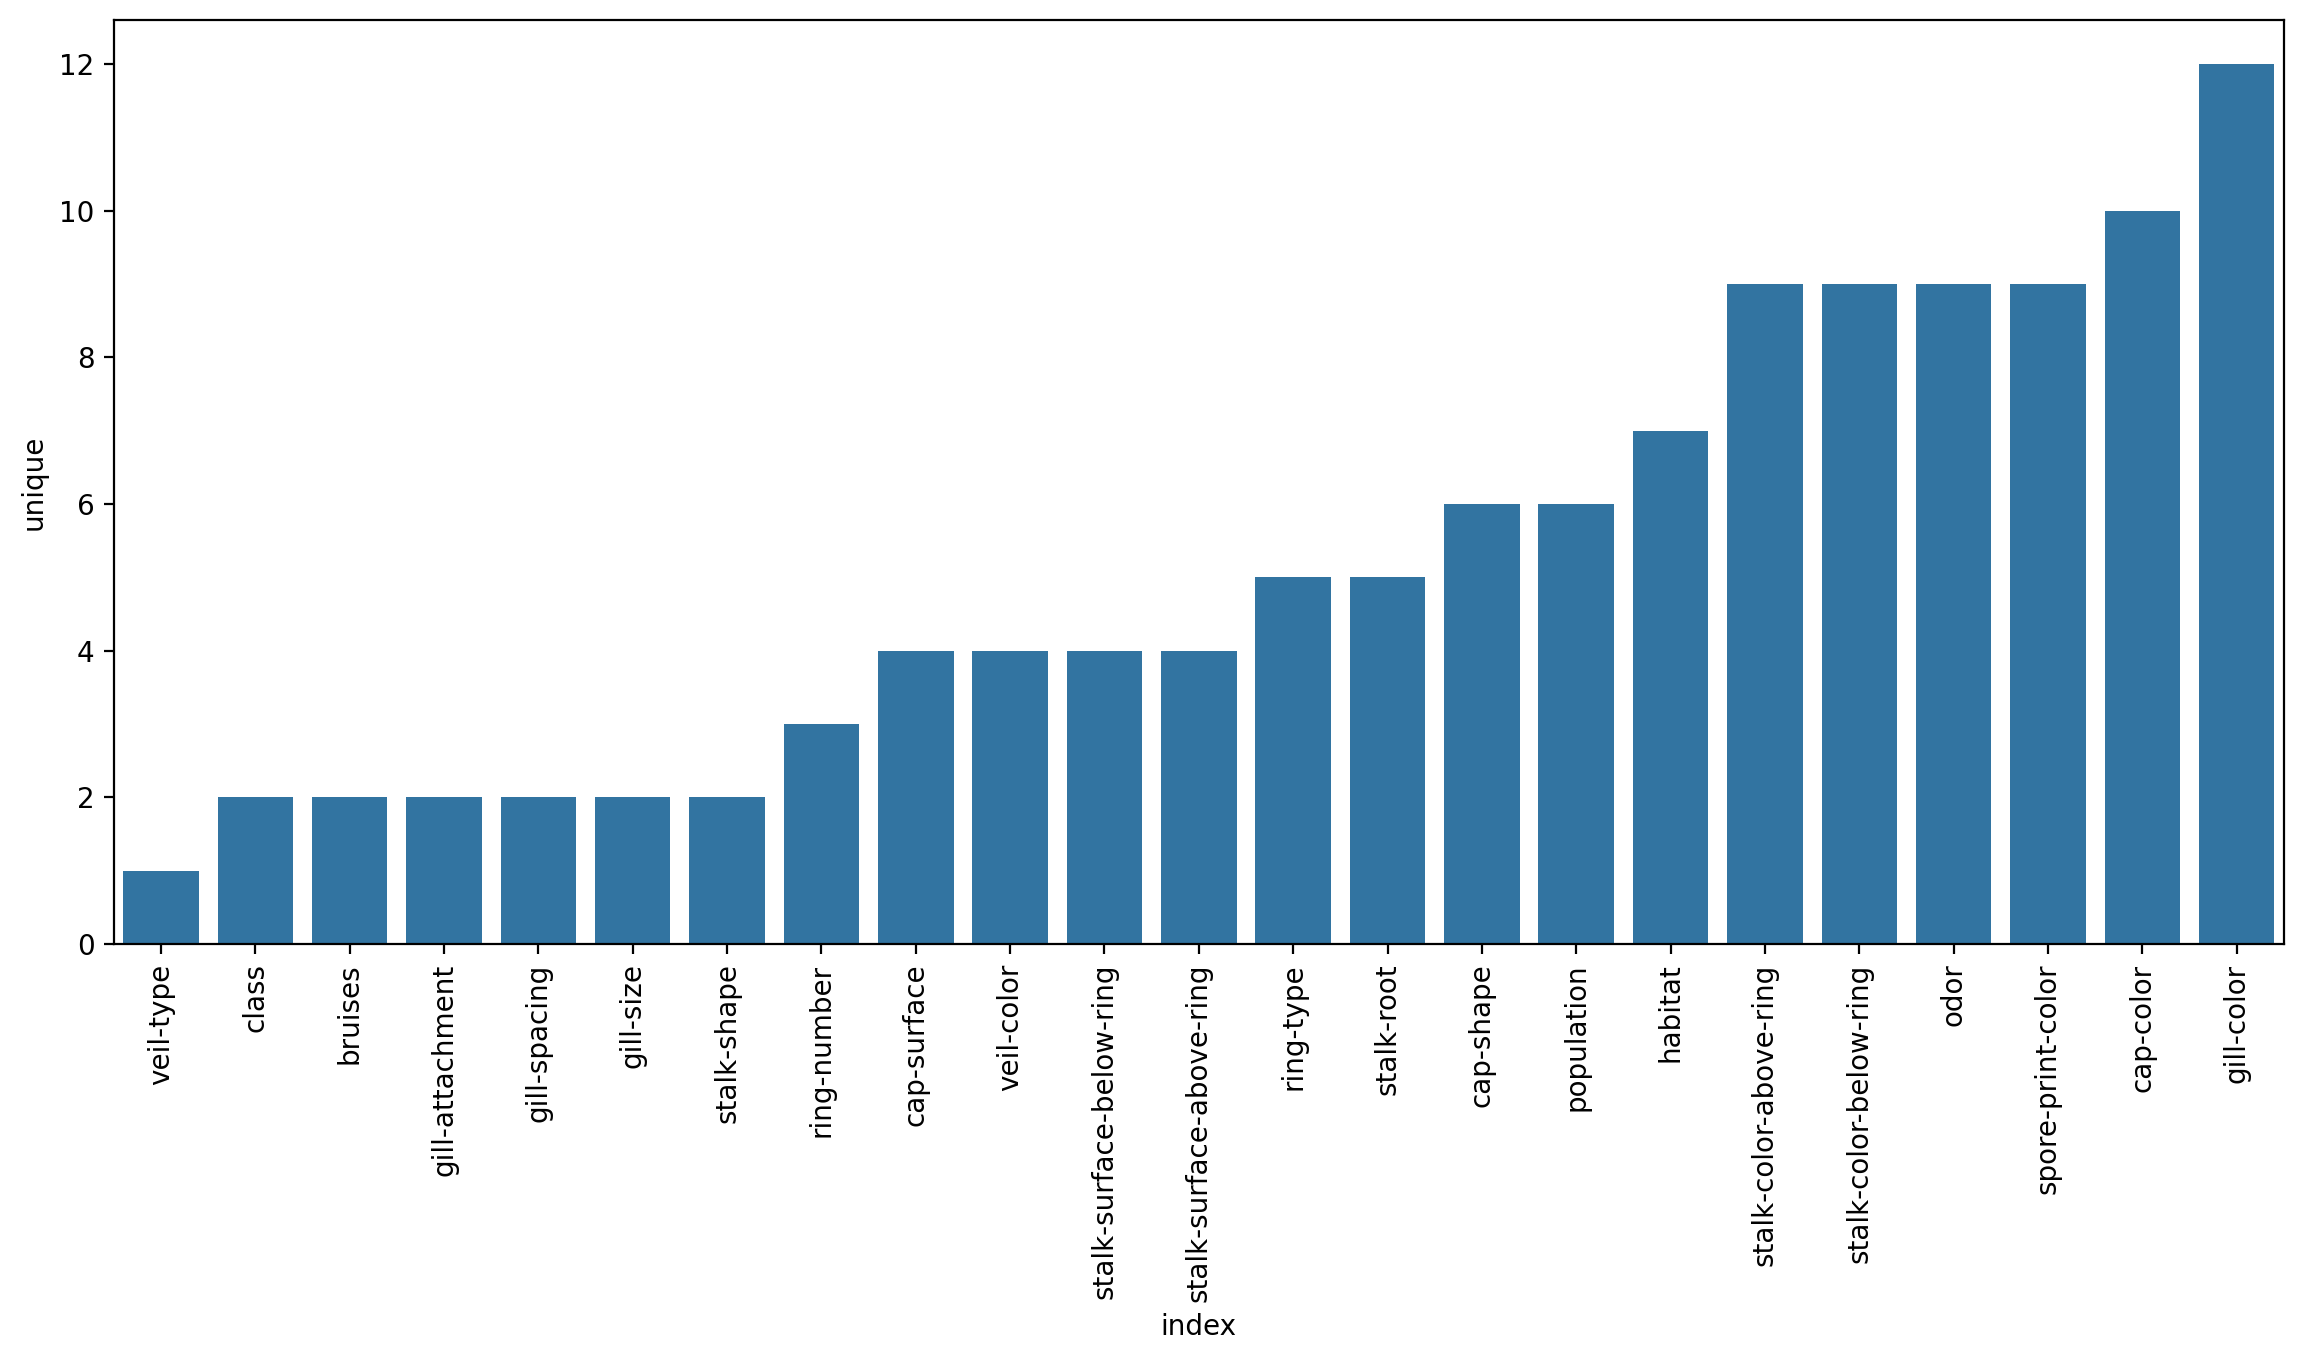

In [8]:
plt.figure(figsize=(14,6) ,dpi=200)
sns.barplot(data=feat_uni , x="index" , y="unique")
plt.xticks(rotation = 90);

In [10]:
X = df.drop("class" , axis=1)

# check we have no missing values
#X.isnull().sum()

In [11]:
# get dummie variables 
X = pd.get_dummies(X , drop_first=True)

In [12]:
y = df["class"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [14]:
# creating the model
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=1) # find the best single feature to start on 

In [15]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [17]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay, accuracy_score

In [18]:
predictions = model.predict(X_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [20]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
model.feature_importances_.argmax() # the most important feature index 

22

<Axes: xlabel='odor', ylabel='count'>

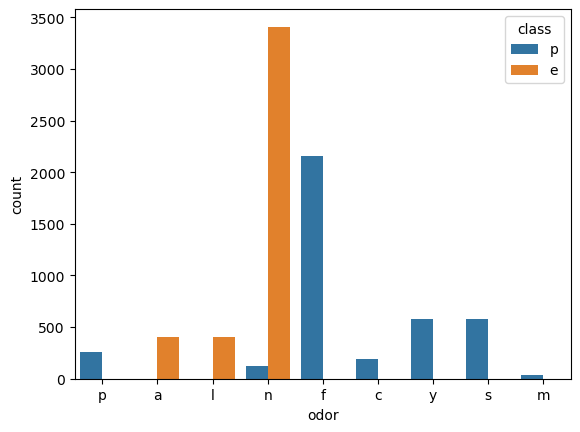

In [23]:
sns.countplot(data=df , x="odor" , hue="class")

In [24]:
# add more learners

error_rates = []

for n in range (1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    err = 1 - accuracy_score(y_test,predictions)
    error_rates.append(err)

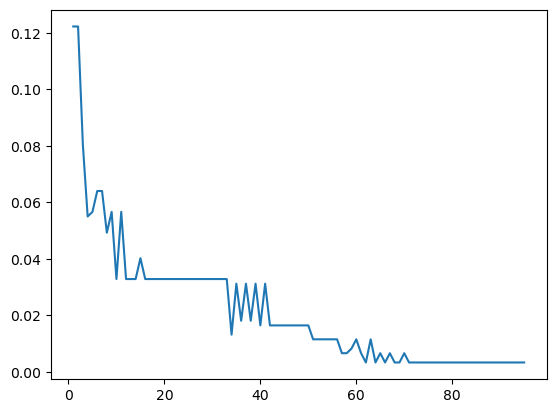

In [25]:
plt.plot(range(1,96) , error_rates)

In [26]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Importances"])
feats

,Importances
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [27]:
imp_feats = feats[feats["Importances"]>0]

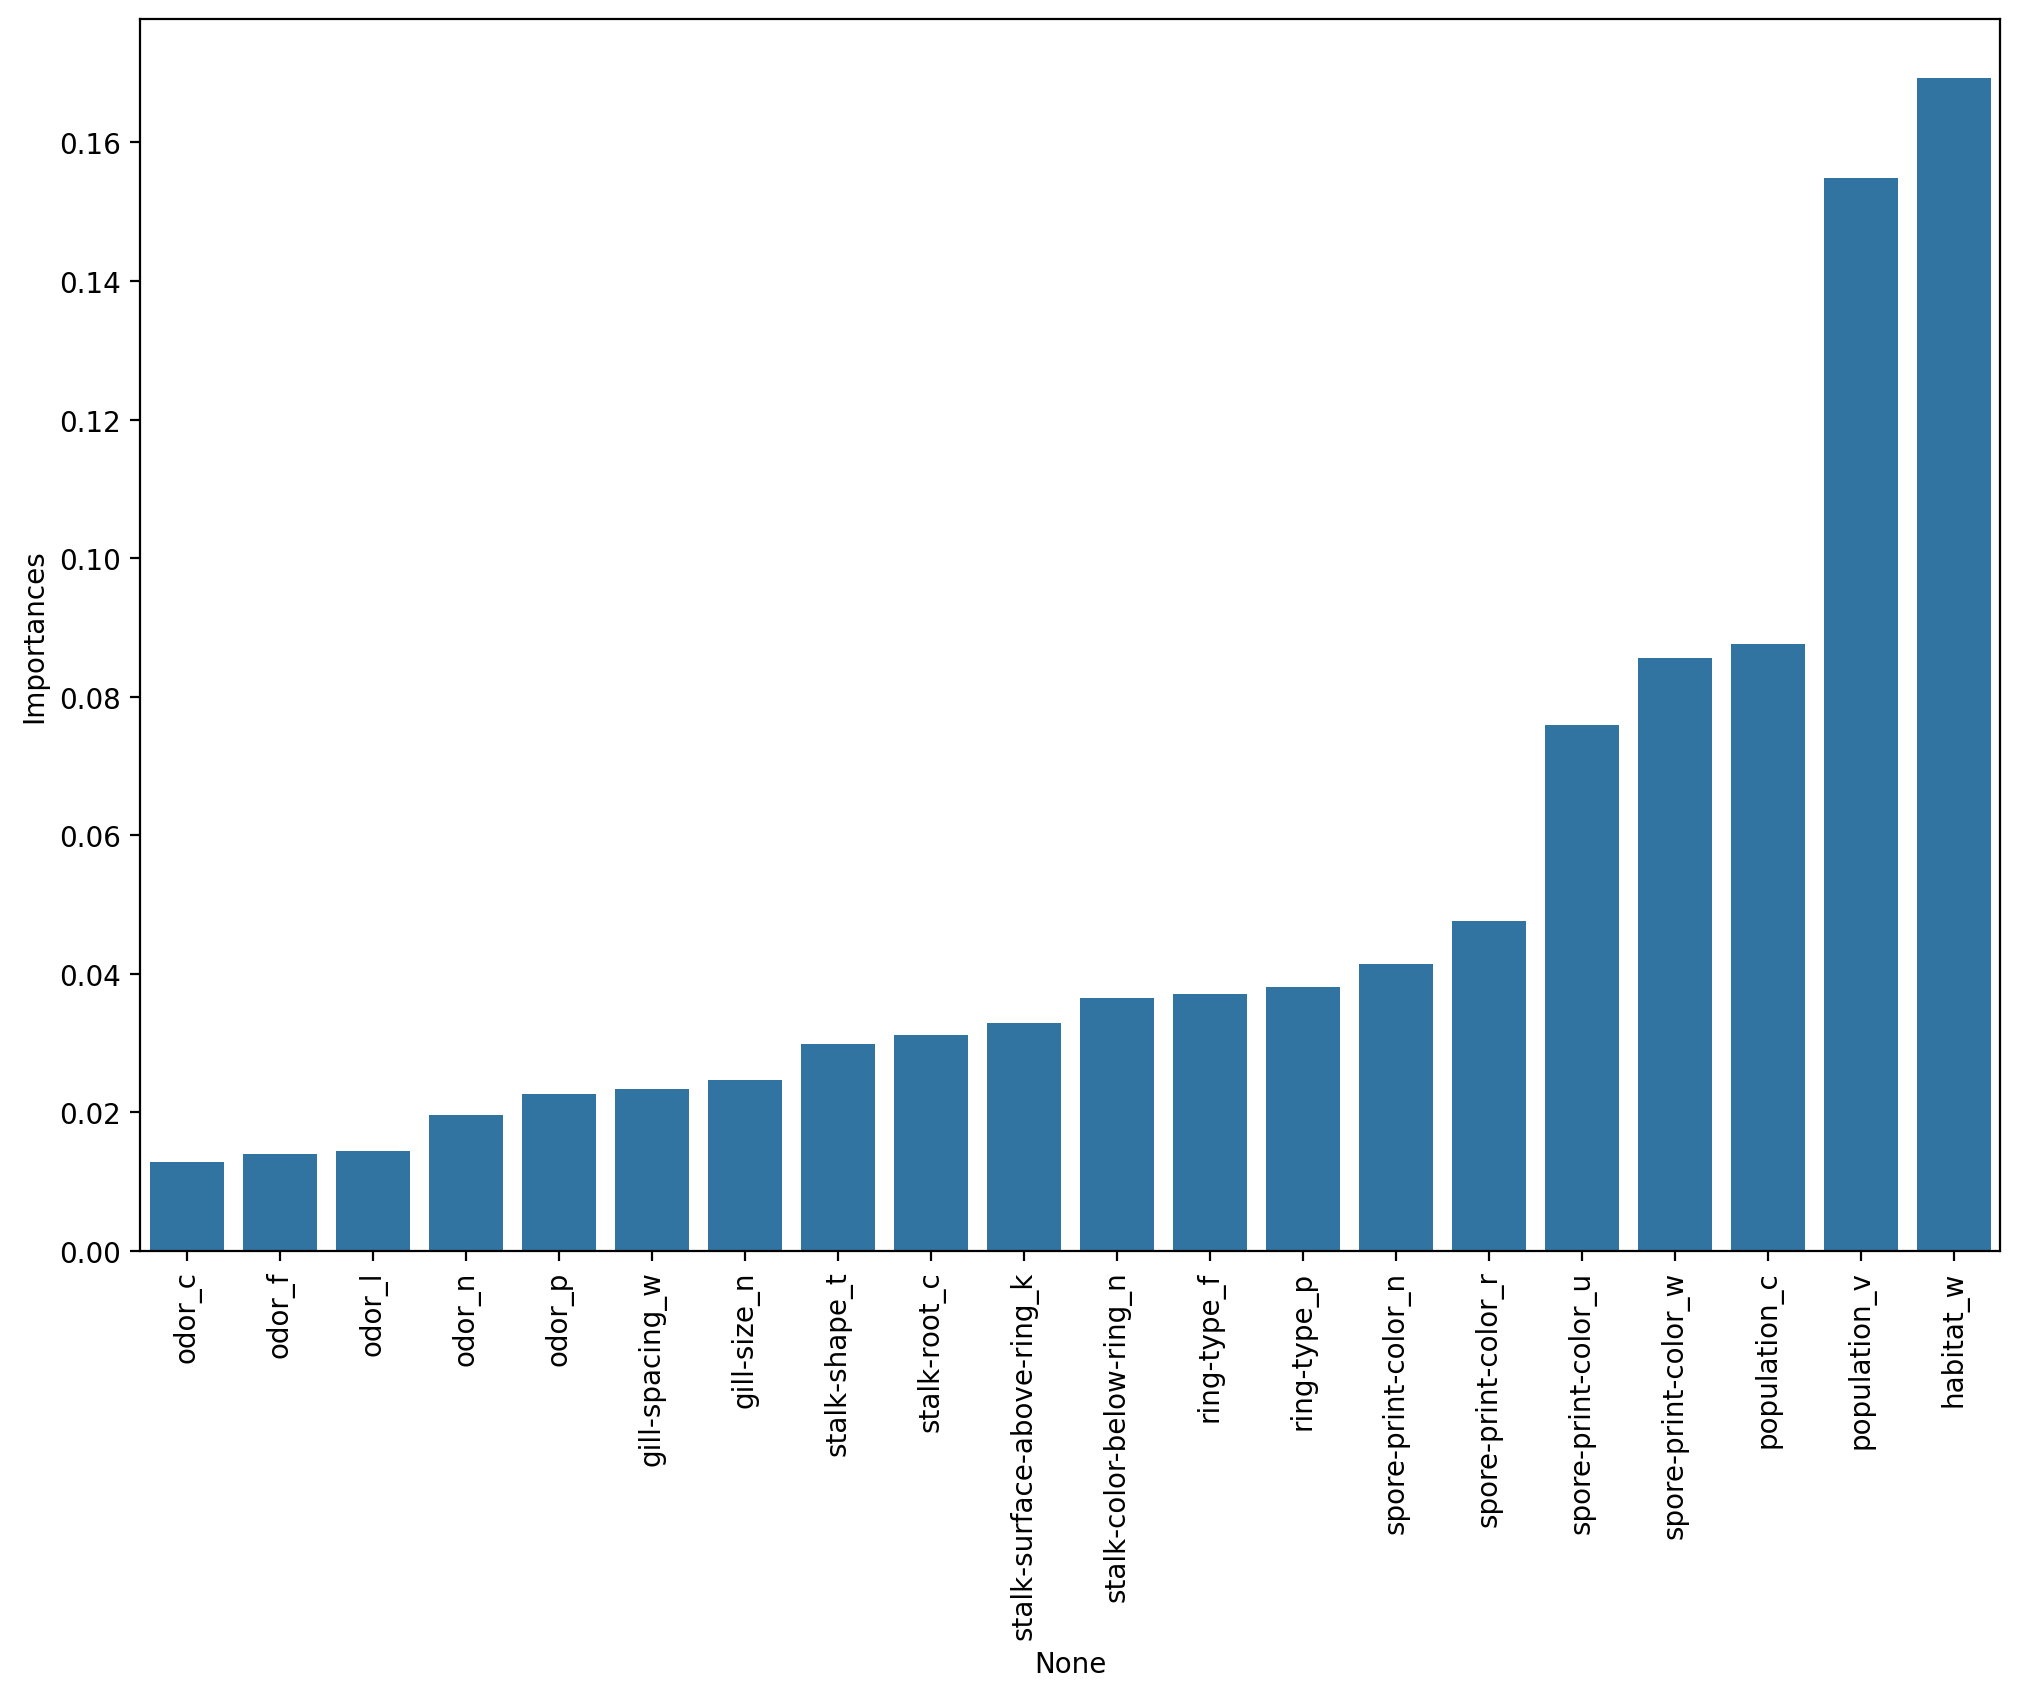

In [29]:
plt.figure(figsize=(12,8) , dpi=200)
sns.barplot(data=imp_feats.sort_values("Importances"), x=imp_feats.index , y="Importances" )
plt.xticks(rotation=90);

# Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
param_gris = { "n_estimators" : [50,100],
              "learning_rate" : [0.1,0.05,0.2],
              "max_depth": [3,4,5]            
}

In [39]:
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid=param_gris)

In [40]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [41]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay, accuracy_score

In [42]:
predictions = grid.predict(X_test)

In [44]:
# check best params 
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [47]:
features = grid.best_estimator_.feature_importances_

In [48]:
imp_features = pd.DataFrame(index=X.columns , data=features,columns=["Importances"])

In [49]:
imp_feats

,Importances
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459
